## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [3]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [9]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [10]:
df.head()
df.tail()

,DATE,TAG,POSTS
2394,2022-12-01 00:00:00,php,3465.0
2395,2022-12-01 00:00:00,python,21313.0
2396,2022-12-01 00:00:00,r,3851.0
2397,2022-12-01 00:00:00,ruby,420.0
2398,2022-12-01 00:00:00,swift,1650.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [7]:
df.shape

(2398, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [8]:
df.count()

m             2398
TagName       2398
Unnamed: 2    2398
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [17]:

df.groupby("TAG").sum().sort_values("POSTS")

,POSTS
TAG,
TagName,0.0
assembly,41921.0
delphi,50403.0
go,66564.0
perl,67390.0
ruby,226854.0
swift,322827.0
c,391110.0
r,476014.0



Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [18]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
TagName,1,0
assembly,173,173
c,173,173
c#,174,174
c++,173,173
delphi,173,173
go,158,158
java,173,173
javascript,173,173


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [19]:
df["DATE"][1]

'2008-07-01 00:00:00'

In [21]:
pd.to_datetime(df["DATE"][1])

Timestamp('2008-07-01 00:00:00')

In [28]:
df.DATE = pd.to_datetime(df.DATE, errors='coerce')

## Data Manipulation



In [34]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-01,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,NaN,28.0,319.0,1644.0,754.0,104.0,NaN,1130.0,634.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,NaN,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,723.0,127.0,611.0,507.0,NaN,247.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,NaN,177.0,1505.0,6339.0,3242.0,133.0,855.0,6534.0,15579.0,118.0,3771.0,21941.0,4344.0,476.0,1744.0
2022-09-01,NaN,191.0,1650.0,5748.0,3088.0,148.0,843.0,6279.0,14326.0,82.0,3397.0,20261.0,4027.0,476.0,1807.0
2022-10-01,NaN,243.0,2015.0,5824.0,3222.0,153.0,742.0,6527.0,14142.0,82.0,3391.0,22147.0,4534.0,436.0,1641.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [35]:
reshaped_df.shape

(175, 15)

In [37]:
reshaped_df.head()
reshaped_df.tail()

TAG,TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,,
2022-08-01,NaN,177.0,1505.0,6339.0,3242.0,133.0,855.0,6534.0,15579.0,118.0,3771.0,21941.0,4344.0,476.0,1744.0
2022-09-01,NaN,191.0,1650.0,5748.0,3088.0,148.0,843.0,6279.0,14326.0,82.0,3397.0,20261.0,4027.0,476.0,1807.0
2022-10-01,NaN,243.0,2015.0,5824.0,3222.0,153.0,742.0,6527.0,14142.0,82.0,3391.0,22147.0,4534.0,436.0,1641.0
2022-11-01,NaN,288.0,2198.0,6089.0,3342.0,116.0,756.0,6856.0,14472.0,110.0,3403.0,23062.0,4654.0,467.0,1694.0
2022-12-01,NaN,308.0,2008.0,5761.0,3192.0,92.0,697.0,6681.0,13877.0,104.0,3465.0,21313.0,3851.0,420.0,1650.0


In [39]:
reshaped_df.columns

Index(['TagName', 'assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java',
       'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [40]:
reshaped_df.count()

TAG
TagName         0
assembly      173
c             173
c#            174
c++           173
delphi        173
go            158
java          173
javascript    173
perl          173
php           173
python        173
r             171
ruby          173
swift         165
dtype: int64

In [41]:
reshaped_df.fillna(0, inplace=True) 

In [43]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

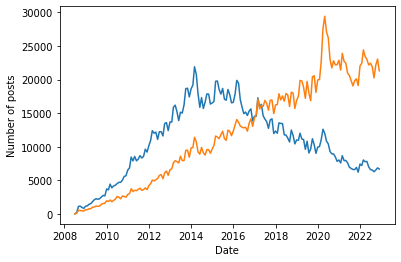

In [50]:
plt.xlabel("Date")
plt.ylabel("Number of posts")
plt.plot(reshaped_df.index, reshaped_df["java"])
plt.plot(reshaped_df.index, reshaped_df["python"])

Text(0, 0.5, 'Number of posts')

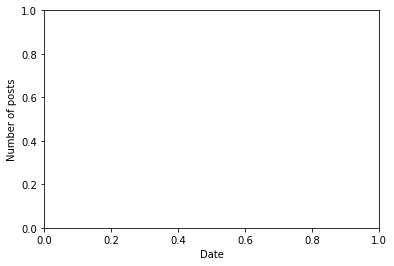

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

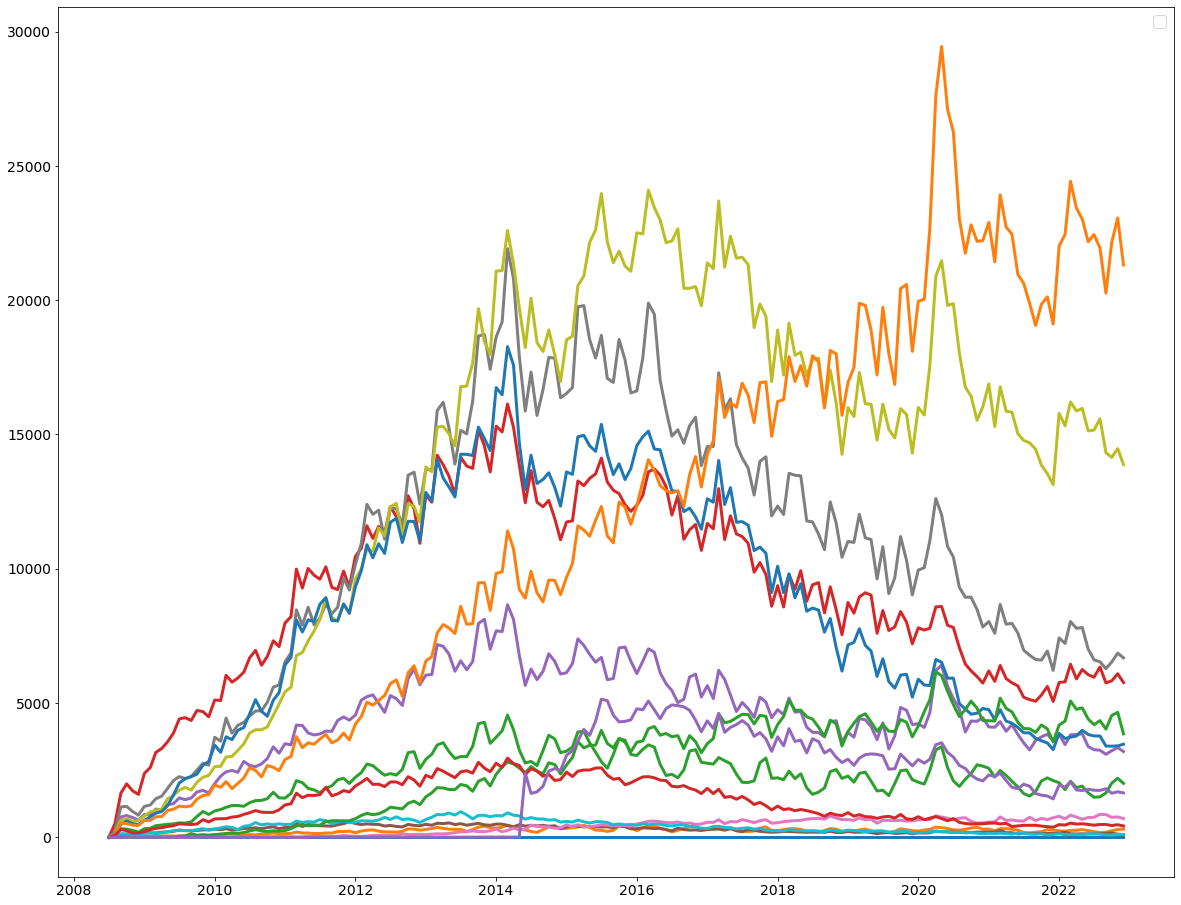

In [56]:
plt.figure(figsize=(20,16))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16) 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

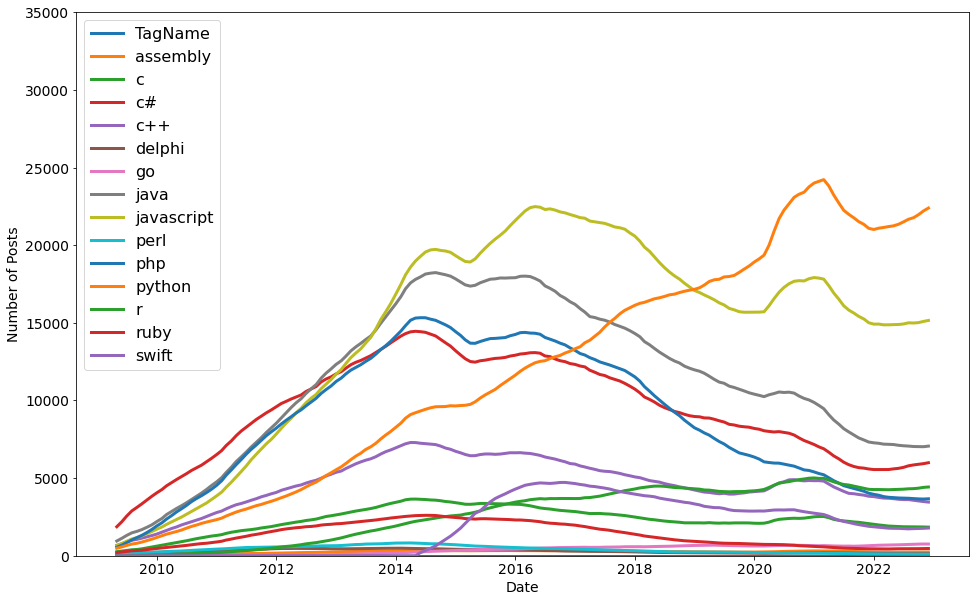

In [59]:
roll_df = reshaped_df.rolling(window=12).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)